# Project 4: Seattle Bicycling

## Part 1:

In [6]:
library(tidyverse)
library(lubridate)
library(scales)
library(reshape2)
library(ggfortify)
library(gridExtra)

In [8]:
FremontBridge <- read.csv("FremontBridge.csv", header=TRUE)
str(FremontBridge)

cat("\n")
cat("Observations:", nrow(FremontBridge))
cat("\n")
cat("Variables:", ncol(FremontBridge), "\n")

'data.frame':	29880 obs. of  3 variables:
 $ Date                        : chr  "10/03/2012 12:00:00 AM" "10/03/2012 01:00:00 AM" "10/03/2012 02:00:00 AM" "10/03/2012 03:00:00 AM" ...
 $ Fremont.Bridge.West.Sidewalk: int  4 4 1 2 6 21 105 257 291 172 ...
 $ Fremont.Bridge.East.Sidewalk: int  9 6 1 3 1 10 50 95 146 104 ...

Observations: 29880
Variables: 3 


## Part 2: 

### Part 2a:

In [9]:
FremontBridge$Date <- as.POSIXct(strptime(FremontBridge$Date,"%m/%d/%Y %I:%M:%S
%p", tz = "PST8PDT")) # in Seattle
FremontBridge$Weekday<- weekdays(FremontBridge$Date)
FremontBridge$Weekday<- as.Date(FremontBridge$Date)

### Part 2b:

In [10]:
FremontBridge$East <- FremontBridge$Fremont.Bridge.East.Sidewalk
FremontBridge$West <- FremontBridge$Fremont.Bridge.West.Sidewalk
FremontBridge$East[is.na(FremontBridge$East)] <- as.integer(0)
FremontBridge$West[is.na(FremontBridge$West)] <- as.integer(0)
FremontBridge$Total <- FremontBridge$East + FremontBridge$West

### Part 2c:

In [12]:
FremontBridge$hour <- format(FremontBridge$Date, "%H")
FremontBridge$dates <- as.Date(FremontBridge$Date, tz = "PST8PDT")
FremontBridge$week <- as.Date(cut(FremontBridge$Date, breaks = "week", 
                                  start.on.monday = TRUE))
FremontBridge$month <- as.Date(cut(FremontBridge$Date,breaks = "month"))

##

### Part 3a:

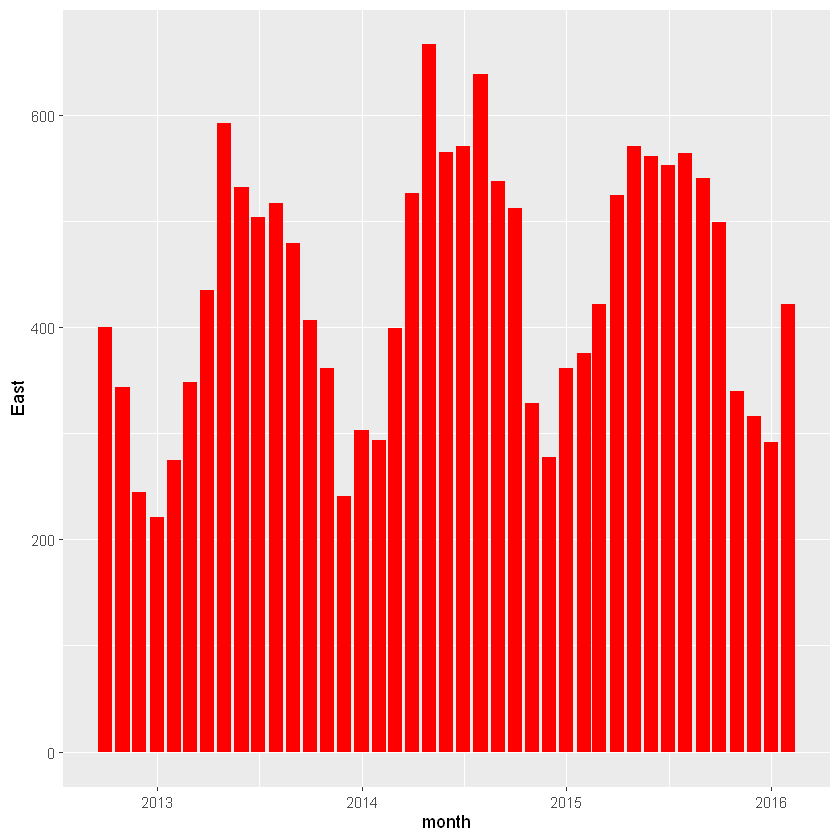

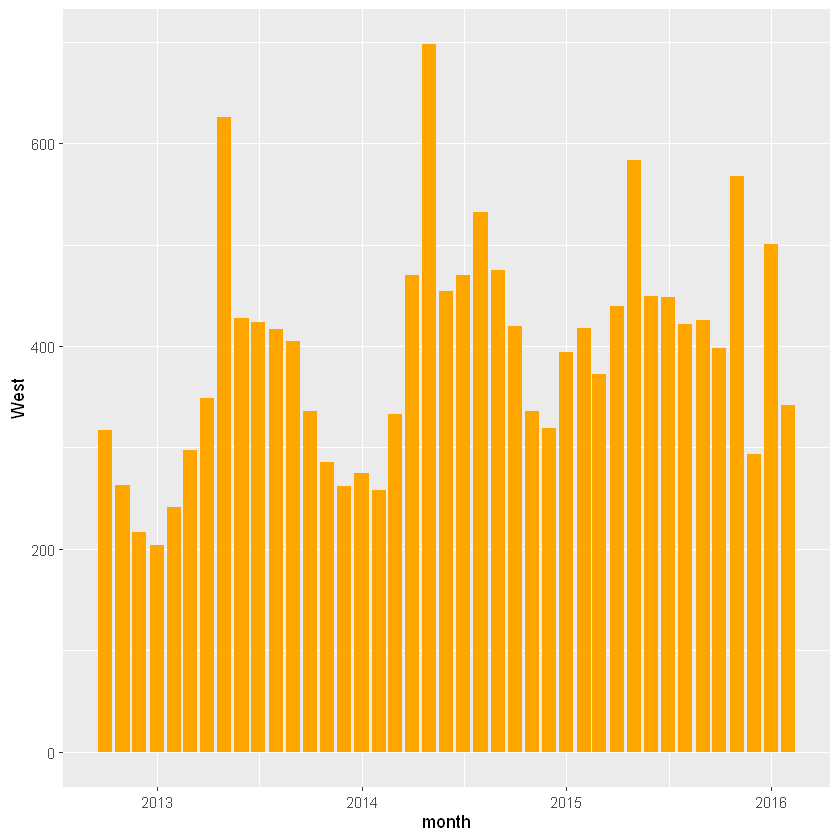

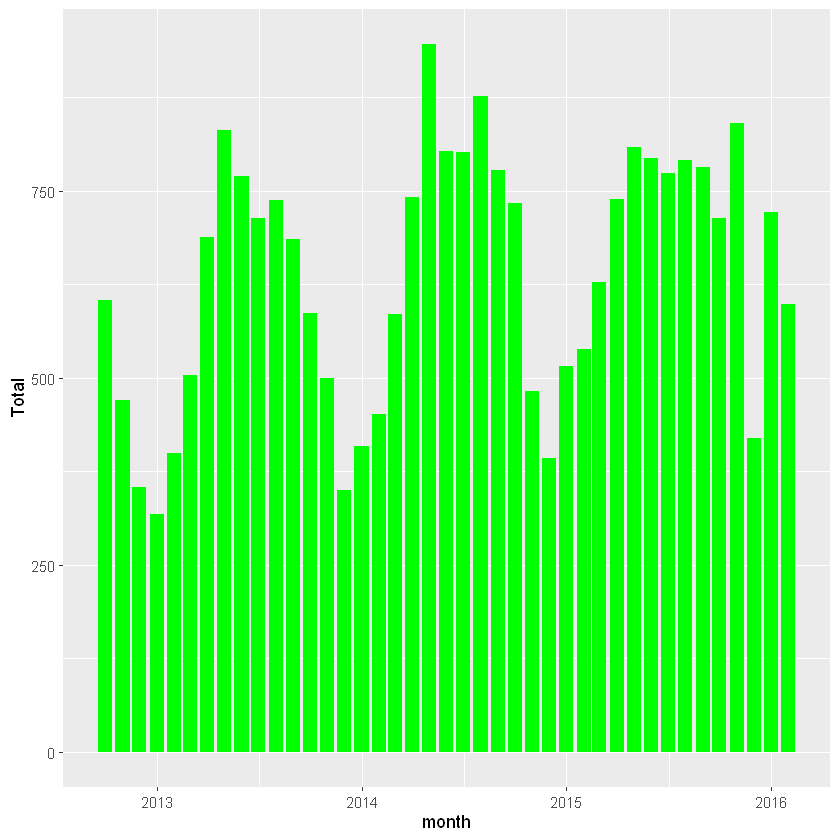

In [13]:
ggplot(data = FremontBridge, aes(x = month, y = East)) +
stat_summary(fun = max, geom = "bar", fill="red")
ggplot(data = FremontBridge, aes(x = month, y = West)) + 
stat_summary(fun = max, geom = "bar", fill ="orange ")
ggplot(data = FremontBridge, aes(x = month, y = Total)) + 
stat_summary(fun = max, geom = "bar", fill ="green")

### Part 3b:

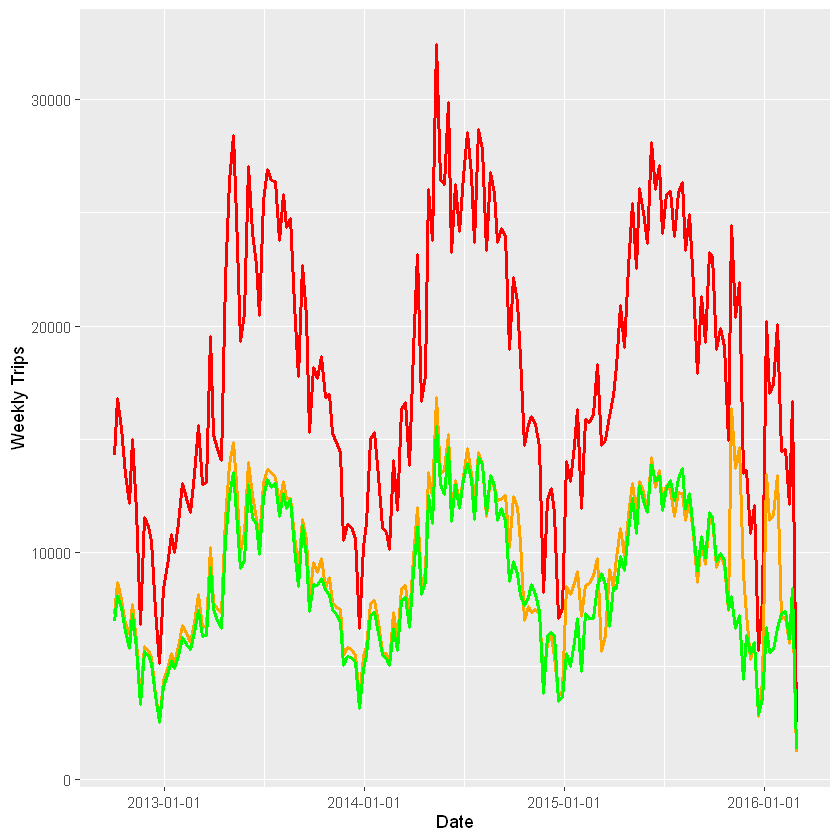

In [14]:
ggplot(FremontBridge) + 
stat_summary(aes(x=week, y=Total), fun = sum, geom = "line", 
             color = "red", linewidth=1) +
stat_summary(aes(x=week,y=West), fun = sum, geom = "line",
             color = "orange", linewidth=1) +
stat_summary(aes(x=week,y=East), fun = sum, geom = "line", 
             color = "green", linewidth=1) +
scale_x_date(breaks = date_breaks(width = "1 year")) + xlab("Date") +
ylab("Weekly Trips")

## Part 4

In [15]:
FremontBridgePivot <- read.csv("FremontBridgePivot.csv", header=TRUE)
FremontBridgePivot$date <- as.POSIXct(strptime(FremontBridgePivot$date,
"%m/%d/%Y", tz = "PST8PDT"))

## Part 5:

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     3.9063 3.7307 1.64046 1.39854 1.32440 1.29295 1.1328
Proportion of Variance 0.3247 0.2961 0.05726 0.04162 0.03732 0.03557 0.0273
Cumulative Proportion  0.3247 0.6208 0.67805 0.71966 0.75698 0.79255 0.8198
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.05672 0.92329 0.89079 0.83996 0.79540 0.77964 0.74374
Proportion of Variance 0.02376 0.01814 0.01688 0.01501 0.01346 0.01293 0.01177
Cumulative Proportion  0.84361 0.86175 0.87863 0.89364 0.90710 0.92004 0.93181
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.7092 0.64236 0.55006 0.53154 0.48016 0.43033 0.42563
Proportion of Variance 0.0107 0.00878 0.00644 0.00601 0.00491 0.00394 0.00385
Cumulative Proportion  0.9425 0.95129 0.95773 0.96374 0.96864 0.97258 0.97644
                          PC22    PC23    

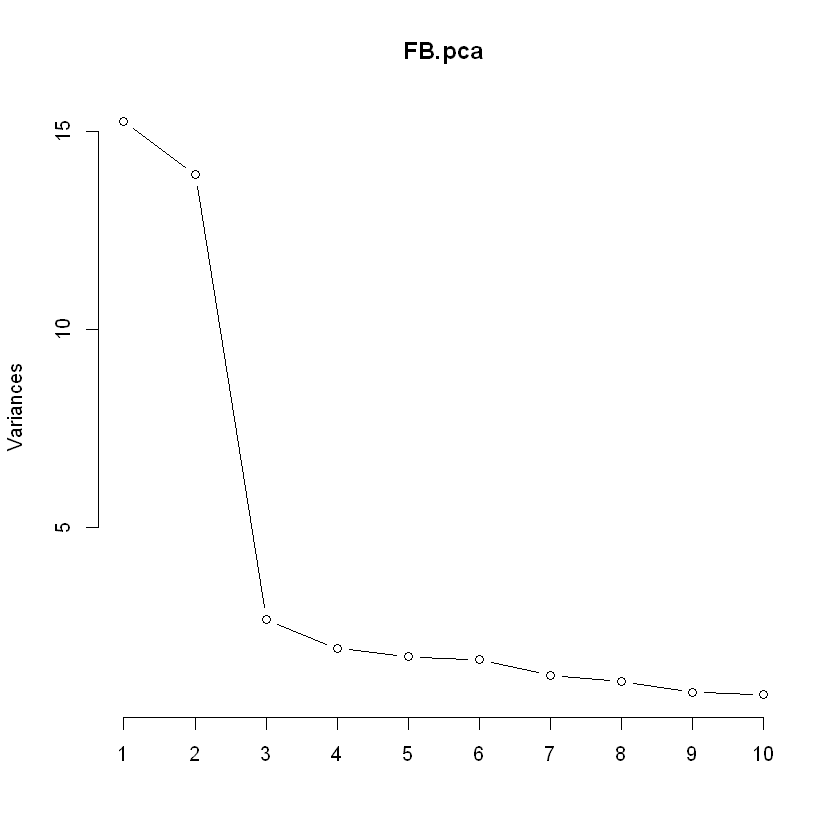

In [16]:
FB.hours <-FremontBridgePivot[, 3:49]
FB.pca <- prcomp(FB.hours, center = TRUE, scale = TRUE)
plot(FB.pca, type = "l")
summary(FB.pca)

It looks like PC1, PC2, and PC3 are all useful, as the elbow plot flattens out at 3. So the cutoff is 3, as the elbow plot clearly shows

## Part 6:

### Part 6a:

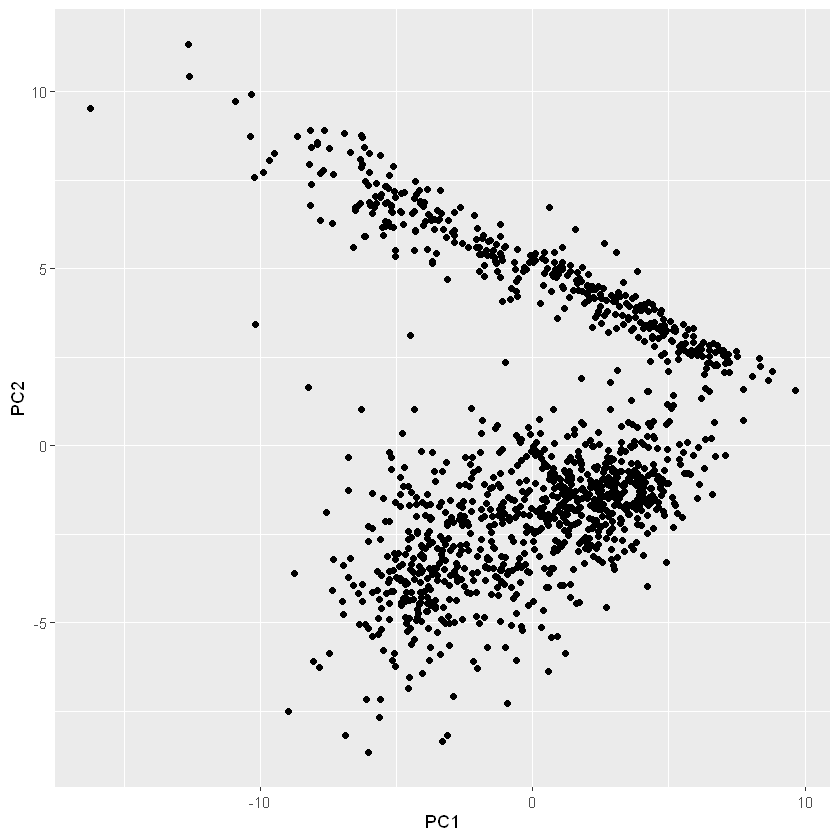

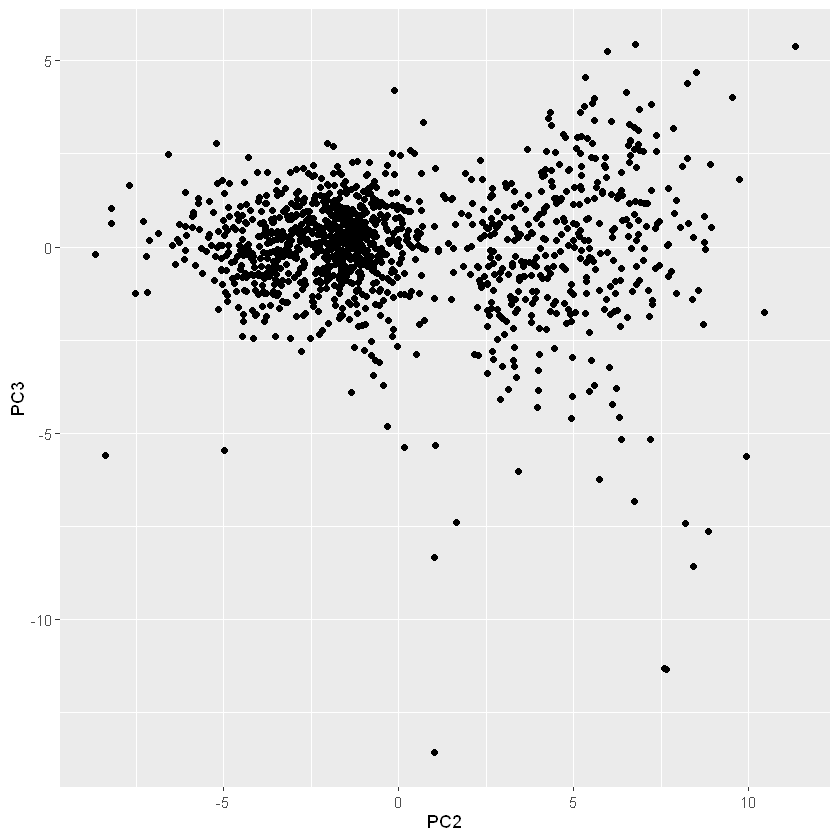

In [17]:
scores <- data.frame(FB.pca$x[,1:3])
ggplot(scores, aes(x=PC1, y=PC2)) + geom_point()
ggplot(scores, aes(x=PC2, y=PC3)) + geom_point()

### Part 6b:

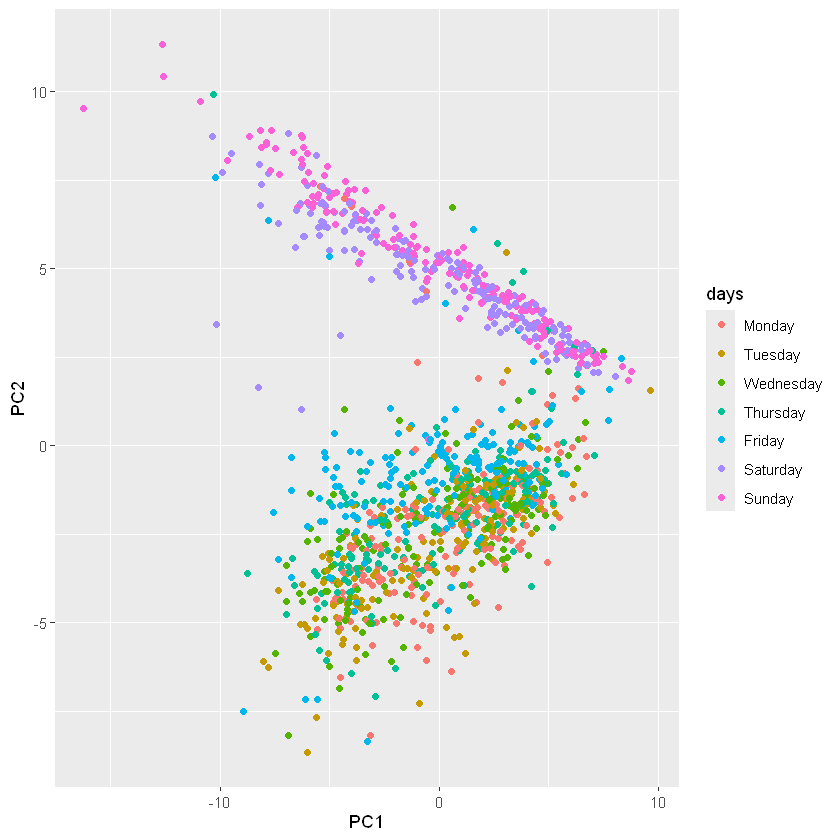

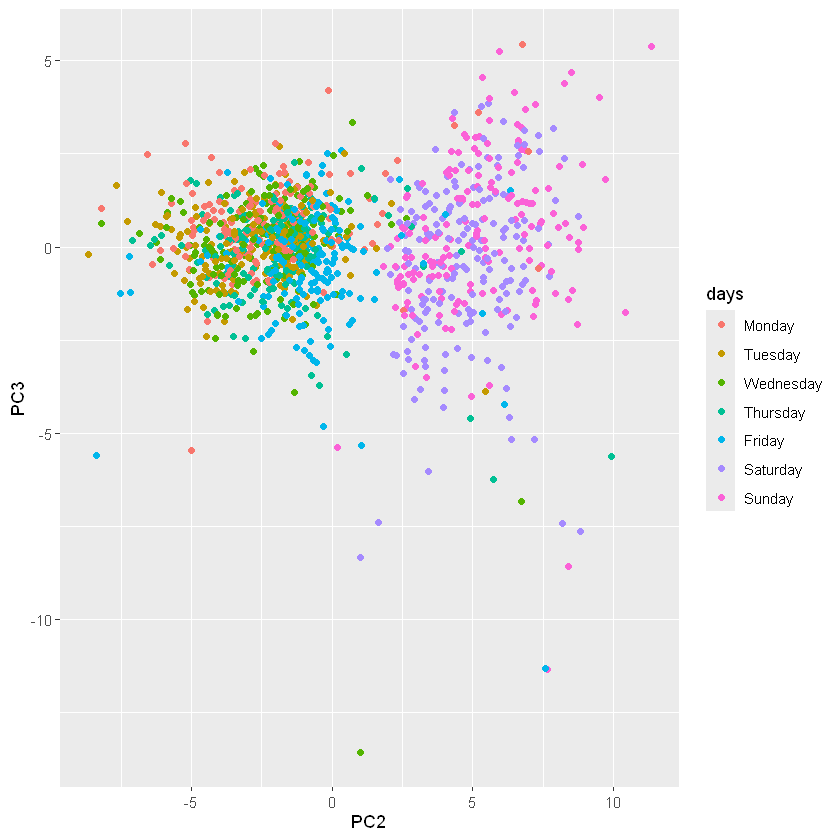

In [18]:
days = factor(weekdays(FremontBridgePivot$date), levels=c("Monday",
"Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
ggplot(scores, aes(x=PC1, y=PC2, color=days)) + geom_point()
ggplot(scores, aes(x=PC2, y=PC3, color=days)) + geom_point()

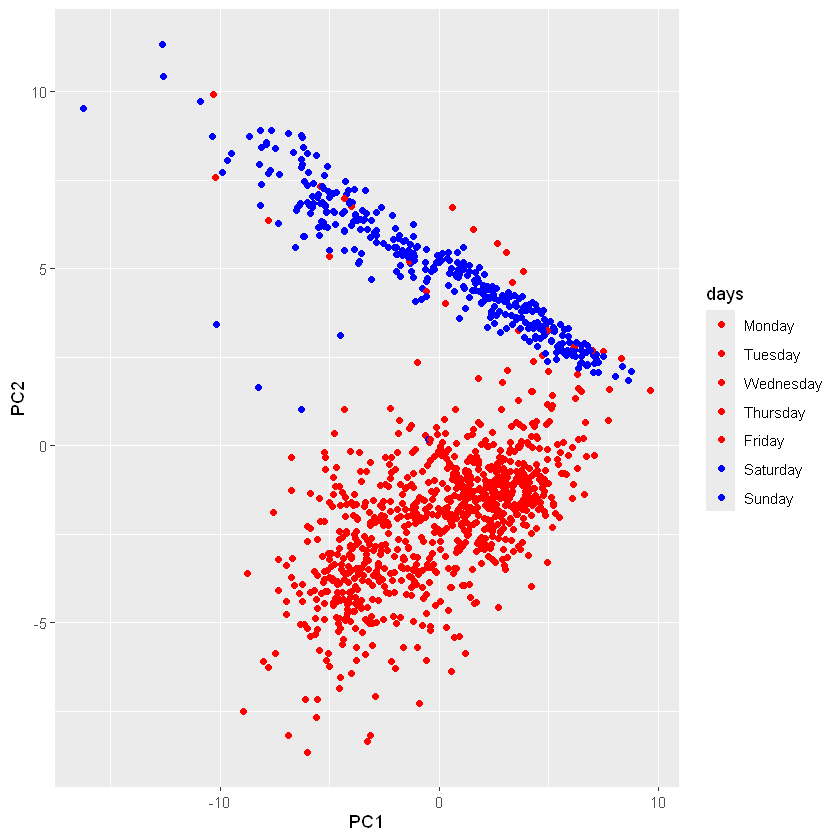

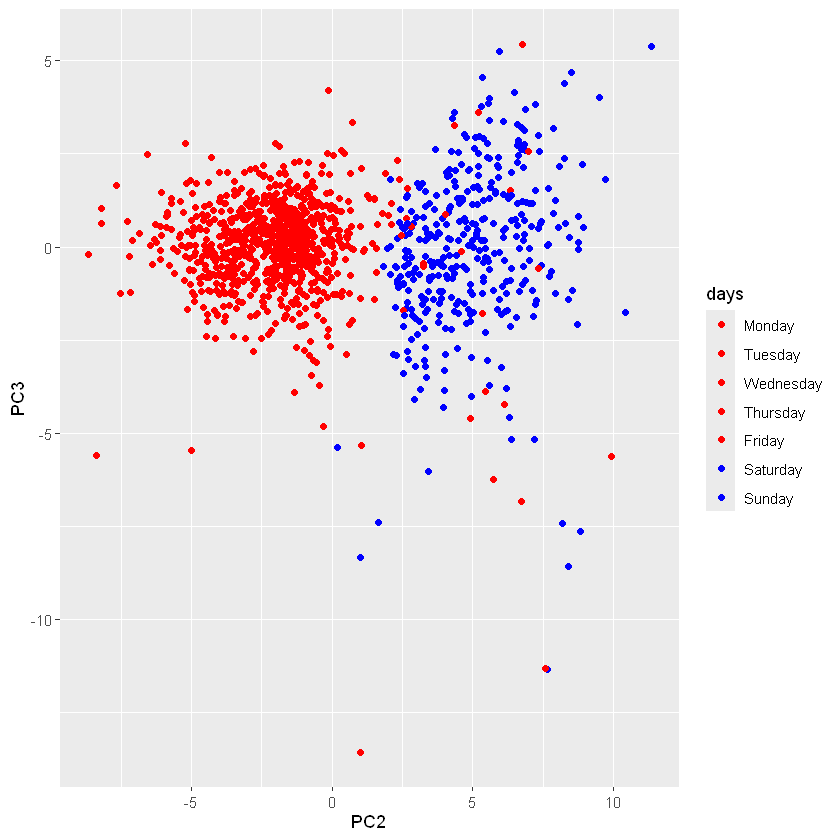

In [22]:
ggplot(scores, aes(x=PC1, y=PC2, color=days)) + geom_point() +
scale_color_manual(values = c("Monday"="red","Tuesday"="red",
"Wednesday"="red","Thursday"="red","Friday"="red","Saturday"="blue",
                              "Sunday"="blue"))
ggplot(scores, aes(x=PC2, y=PC3, color=days)) + geom_point() + 
scale_color_manual(values = c("Monday"="red","Tuesday"="red",
"Wednesday"="red","Thursday"="red","Friday"="red","Saturday"="blue",
                              "Sunday"="blue"))

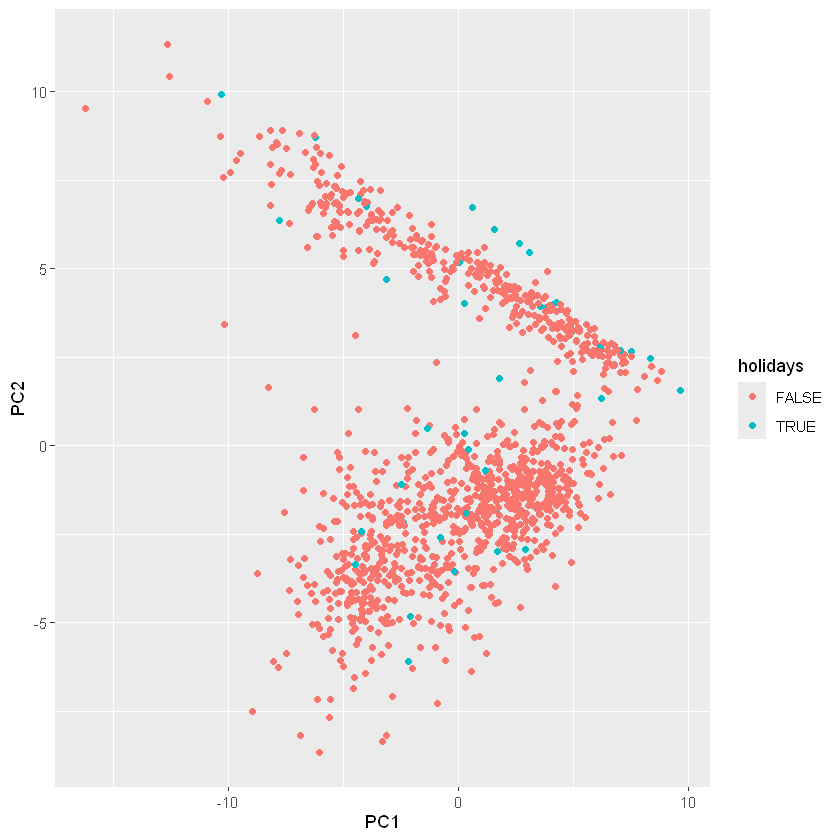

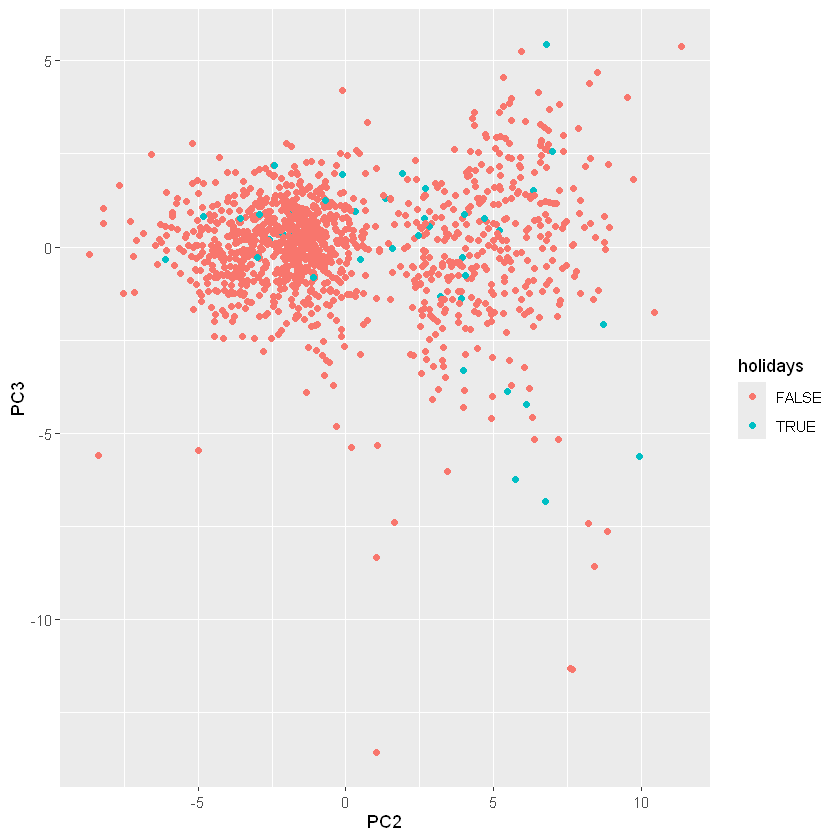

In [23]:
holidays = format(FremontBridgePivot$date, "%m/%d") %in% c("01/01", 
"01/20", "02/17", "05/26", "06/19", "07/04", "09/01", "10/13", "11/11", 
                                            "11/27", "12/25")

ggplot(scores, aes(x=PC1, y=PC2, color=holidays)) + geom_point()
ggplot(scores, aes(x=PC2, y=PC3, color=holidays)) + geom_point()

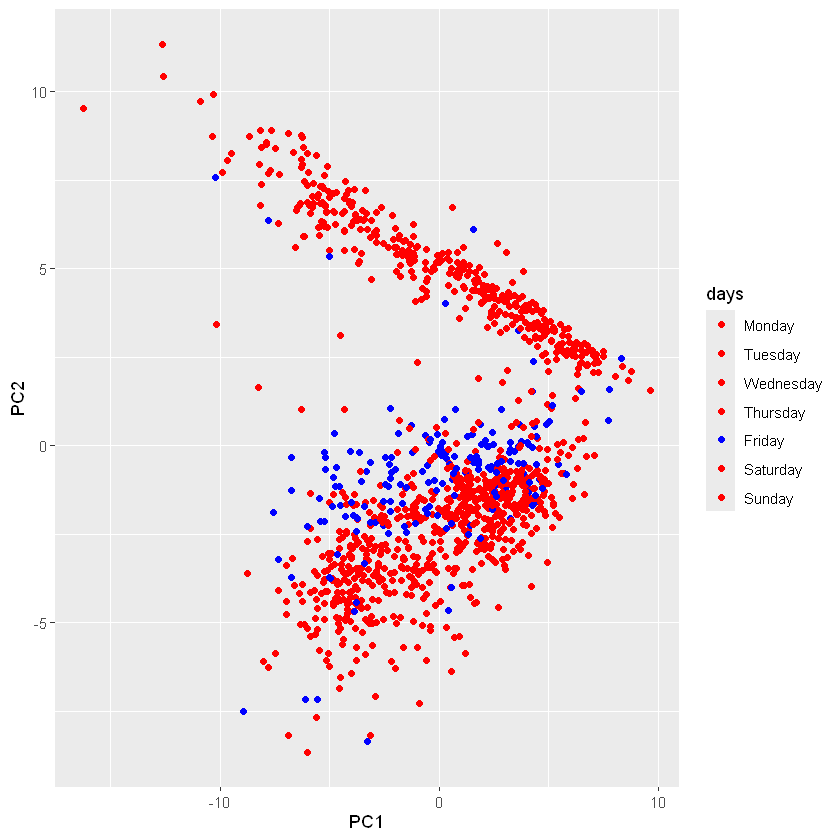

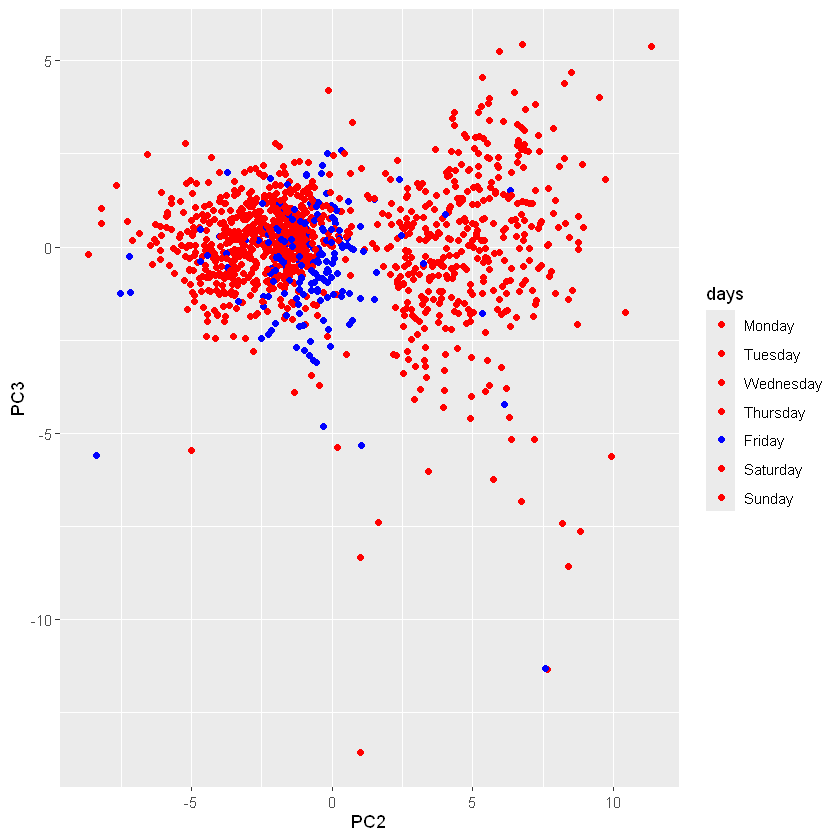

In [21]:
ggplot(scores, aes(x=PC1, y=PC2, color=days)) + geom_point() +

scale_color_manual(values = c("Monday"="red","Tuesday"="red","Wednesday"="red",
"Thursday"="red","Friday"="blue","Saturday"="red","Sunday"="red"))
ggplot(scores, aes(x=PC2, y=PC3, color=days)) + geom_point() +
scale_color_manual(values = c("Monday"="red","Tuesday"="red","Wednesday"="red",
"Thursday"="red","Friday"="blue","Saturday"="red","Sunday"="red"))